# Рекомендация тарифов

# Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.


**Дополнительное задание:** проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

1. [Обзор данных](#description)
    * [Вывод](#conclution1)
2. [Предобработка данных](#preprocessing)
    * [Вывод](#conclution2)
3. [Сравнение моделей](#ml)
    * [Вывод](#conclution3)
4. [Общий вывод](#conclusion)

<a id="description"></a>
## Обзор данных

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
user_info = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
        "Корреляция:", df.corr(),
        sns.heatmap(df.corr())
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


'Сводная информация:'

None

'10 строк:'

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


'Столбцы:'

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

'Числовое описание:'

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


'Сумма пропусков:'

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

'Доля пропусков:'

calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<AxesSubplot:>

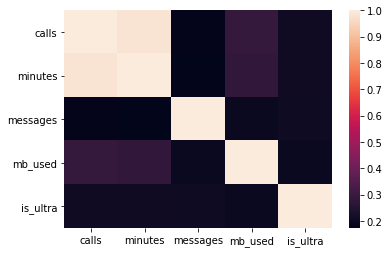

In [5]:
explore_data(user_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


'Сводная информация:'

None

'10 строк:'

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


'Столбцы:'

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

'Числовое описание:'

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


'Сумма пропусков:'

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

'Доля пропусков:'

calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<AxesSubplot:>

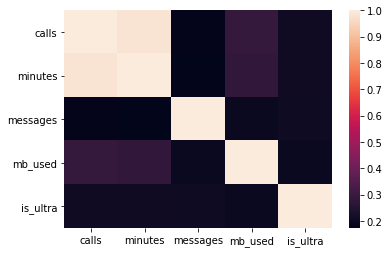

In [6]:
explore_data(user_info)

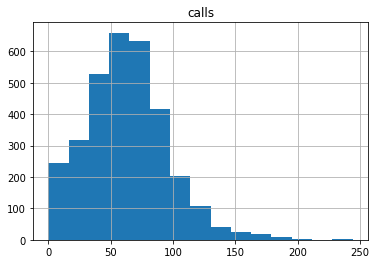

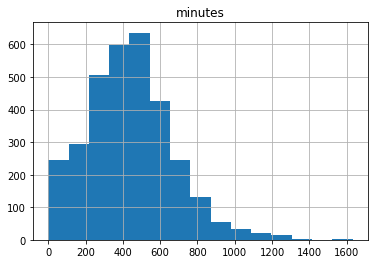

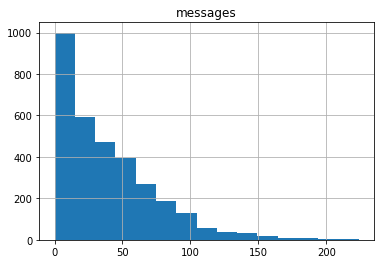

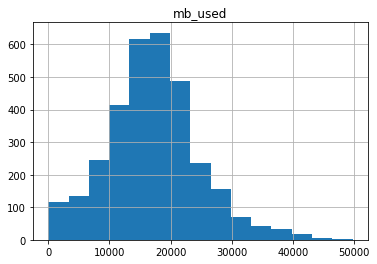

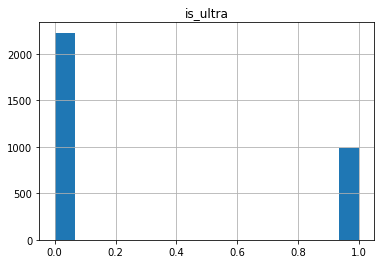

In [7]:
for column in user_info.columns:
    user_info[column].hist(bins=15)
    plt.title(column)
    plt.show()

Пропусков нет, названия столбцов корректны, больное количество пользователей, которые не используют смс, чаще меняют тариф на смарт, для экономии вычислительных мощностей можно преобразовать типы в 'float32', 'int32'
нельзя не заметить очень высокую кореляцию между количеством звонков и минут

<a id="preprocessing"></a>
## Подготовка данных

In [8]:
user_info[user_info.columns[:-1]] = user_info[user_info.columns[:-1]].astype('float32')
user_info[user_info.columns[-1]] = user_info[user_info.columns[-1]].astype('int32')


Разделим набор на тренировочную, тестовую, валидационную части в соотношении 60:20:20

In [9]:
print(user_info.shape)
train,test = train_test_split(user_info,test_size=0.2, random_state=12345)
print(train.shape,test.shape)
train, valid = train_test_split(train, test_size = 0.25, random_state=12345)
print(train.shape,valid.shape, test.shape)

(3214, 5)
(2571, 5) (643, 5)
(1928, 5) (643, 5) (643, 5)


In [10]:
features_train = train.drop('is_ultra', axis=1)
target_train = train['is_ultra']
features_valid = valid.drop('is_ultra', axis=1)
target_valid = valid['is_ultra']
features_test = test.drop('is_ultra', axis=1)
target_test = test['is_ultra']

<a id="ml"></a>
## Сравнение моделей

Сравним модели RandomForestClassifier, DecisionTreeClassifier, LogisticRegression

In [11]:
best_model = None
best_result = 0

In [12]:
for est in range(1, 11):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model
            best_result = result

#print(f"Accuracy наилучшей модели {best_model} на валидационной выборке: {best_result}")

In [13]:
#best_model = None
#best_result = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model
        best_result = result
#print(f"Accuracy наилучшей модели {best_model} на валидационной выборке: {best_result}")

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#best_model = None
#best_result = 0
for solver_ in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']:
    model = LogisticRegression(random_state=12345, solver=solver_, max_iter=1000)
    model.fit(features_train, target_train)
    #logit_roc_auc = roc_auc_score(target_train, model.predict(features_train))
    #fpr, tpr, thresholds = roc_curve(target_train, model.predict_proba(features_train)[:,1])
    
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model
        best_result = result
#print(f"Accuracy наилучшей модели {best_model} на валидационной выборке: {best_result}")
    


''' plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic {solver_}')
    plt.legend(loc="lower right")
    plt.show()
'''

In [16]:
print(f"Accuracy наилучшей модели {best_model} на валидационной выборке: {best_result}")

Accuracy наилучшей модели RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345) на валидационной выборке: 0.7776049766718507


Выявили лучшую модель - RandomForestClassifier с гиперпараметрами max_depth=5, n_estimators=8

<a id="test"></a>
## Проверка модели на тестовой выборке

In [17]:
predictions = best_model.predict(features_test)

In [18]:
print(f"Accuracy наилучшей модели {best_model} на тестовой выборке: {accuracy_score(target_test,predictions):0.3f}")

Accuracy наилучшей модели RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345) на тестовой выборке: 0.782


<a id="correct"></a>
## Проверка модели на адекватность

Text(0.5, 1.0, 'Матрица ошибок')

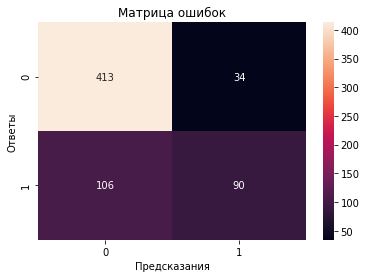

In [19]:
sns.heatmap(confusion_matrix(target_test, predictions), annot=True, fmt='d')
plt.xlabel("Предсказания")
plt.ylabel("Ответы")
plt.title("Матрица ошибок")

Посмотрим распределение классов на тестовой выборке

0    0.807154
1    0.192846
dtype: float64


<AxesSubplot:title={'center':'Распределение классов'}>

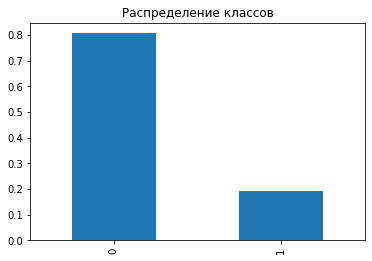

In [20]:
class_frequency = pd.Series(predictions).value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', title='Распределение классов') 

очевидно преобладание тарифа смарт. Создадим простую модель, которая всегда будет предсказывать класс тарифа смарт

In [21]:
target_pred_constant = pd.Series([0]*len(target_test))

print(accuracy_score(target_test, target_pred_constant).round(3)) 

0.695


Ураааа , победили простую модель аж на 9% 

<a id="conclusion"></a>
## Вывод


Построили модель для задачи классификации, которая выбирает подходящий тариф, с долей правильных 0.78 ответов на тестовой выборке.

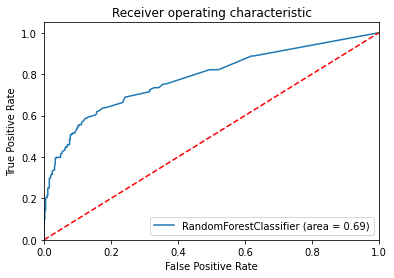

In [22]:
roc_auc = roc_auc_score(target_test, best_model.predict(features_test))
fpr, tpr, thresholds = roc_curve(target_test, best_model.predict_proba(features_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
print(f"Accuracy: {accuracy_score(target_test,predictions)}")
print(f'precision: {precision_score(target_test, predictions)}')
print(f'recall: {recall_score(target_test, predictions)}')
print(f'f1: {f1_score(target_test, predictions)}')


Accuracy: 0.7822706065318819
precision: 0.7258064516129032
recall: 0.45918367346938777
f1: 0.5625000000000001


Есть над чем работать, необходимо каким-то образом улучшить метрики распознавания